### **Question 1: Showing data**

**1.i How many training and test examples are there? You can use np.loadtxt for this purpose.**


In [ ]:
import numpy as np
import matplotlib.pyplot as plot

test = np.loadtxt('./Xtest.csv')
train = np.loadtxt('./Xtrain.csv')

test_num = sum(1 for row in test)
train_num = sum(1 for row in train)
print('The number of test is: ', test_num)
print('THe number of train is: ', train_num)






The number of test is:  3000
THe number of train is:  3000


**1.i Show at least 10 randomly selected objects of each class using plt.matshow.**

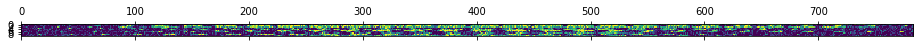

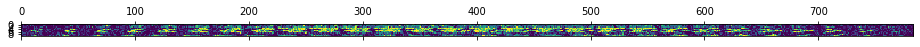

In [ ]:
import random

ytrain = np.loadtxt('./Ytrain.csv')
train = np.loadtxt('./Xtrain.csv')
pos = []
negative = []
for i in range(len(ytrain)):
  if ytrain[i] == 1:
    pos.append(train[i])
  else:
    negative.append(train[i])


pos_array = random.sample(pos, 10)
neg_array = random.sample(negative, 10)
plot.matshow(pos_array)
plot.matshow(neg_array)



**1.ii How many positive and negative examples are there in the training dataset?**

In [ ]:
train2 = np.loadtxt('./Ytrain.csv')
positive = 0
negative = 0
for i in train2:
  if i > 0:
    positive +=1
  else:
    negative  +=1

print('Positive example in training is', positive)
print('Negative example in training is ', negative)

Positive example in training is 2118
Negative example in training is  882


**Question 1.iii Which performance metric (accuracy, AUC-ROC and AUC-PR) should be used? Give your reasoning.**

**Answer 1.iii**

AUC-PR should be used because in this case, the dataset is imbalance and the majority data is positive. It is more sensitive to the improvement for the positive class. Also AUC-PR does not requies the threshold to calculate the result. Therefore, based on the imbalance dataset, AUC-PR needs to be used.

AUC-ROC should not be used in this case because of the imbalance dataset. AUC-ROC looks at a true positive rate TPR and false positive rate FPR. Howver, this case is not balance. Therefore, it will have the bias.

Accuracy is calculate on the predicted class and need to find the optimal threshold. Also, accuracy looks at fraction of correctly assigned positive and negative classes.





**Question 1.iv What is the expected accuracy of a random classifier (one that generates random labels for a given example) for this problem over the training and test datasets? Demonstrate why this would be the case.**

**Answer 1.iv**

For the random classifier, the accuracy is always 50%. The formula of calculating the accuracy is 1/k and k means the number of the classes. In this case, there are 2 classes for the dataset, so the classification accuracy of the random classisifer is 1/2= 50%. 

**Question 1.v What is the AUC-ROC and AUC-PR of a random classifier for this problem over the training and test datasets? Demonstrate why this would be the case.**

**Answer 1.v**

The AUC-ROC is 0.5. A random classifier assign the score distribution between 0 and 1. For example, if the threshold selected 'x', any score above 'x' is positive, the probability of being labelled positive is 1-x and because x is between 1 and 0, TPR and FPR are between 1 and 0. Therefore, the line obtained is x=y in diagonal.


The reason why ROC is 0.5:
TPR = TP/(TP+FN);FPR=FP/(FP+TN)
TPR represents the percentage of all sample should be classified as 1 that is exactly 1. FPR represent the percentage of all the sample should be classified as 1 that misclassified as 0. 
In this case, because it is random classifier, the possiblility of getting 0 or 1 is the same. Therefore it is 0.5.


The AUC-PR of a random classifier is also close to 0.5.
Recall = TP/(TP/FN); Precision = TP/(TP+FP)
It is same as ROC, if use the random classifier to choose the sample 0 or 1, it should be 0.5. 





# **Question 2: Nearest Neighbor Classifier**

This block uses to pre-build all the setting of different chart function and use it later on. 

In [30]:
#This block is preliminary steps for some of the following codes.
#pre-build the useful function
from numpy.random import randn #importing randn
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing plotting module
import itertools
import warnings

def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours   
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)        
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-eps, np.max(X[:,d0])+eps
        miny, maxy = np.min(X[:,d1])-eps, np.max(X[:,d1])+eps
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None:
            conts = list(classes)        
        vmin,vmax = classes[0]-eps,classes[-1]+eps
    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None:            
            conts = sorted([-1+eps,0,1-eps])
        
    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)
        
        z = np.reshape(z,(npts,npts)).T        
        
        
        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)
    
    if Y is not None:        
        for i,y in enumerate(classes):
            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]
            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 30)     
         
    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')   
    if not hold:
        plt.grid()        
        plt.show()
    return extent

def getExamples(n=100,d=2):
    """
    Generates n d-dimensional normally distributed examples of each class        
    The mean of the positive class is [1] and for the negative class it is [-1]
    """
    Xp = randn(n,d)#+1   #generate n examples of the positie class
    Xp=Xp+1
    Xn1 = randn(int(n/2),d)#-1   #generate n examples of the negative class
    Xn1=Xn1-1
    Xn2 = randn(int(n/2),d)#-1   #generate n examples of the negative class
    Xn2=Xn2+2
    Xn = np.vstack((Xn1,Xn2))  #Stack the examples together to a single matrix
    X = np.vstack((Xp,Xn))  #Stack the examples together to a single matrix
    Y = np.array([+1]*n+[-1]*n) #Associate Labels
    return (X,Y) 
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score
def plotROC(y,z,pstr = ''):
    fpr,tpr,tt = roc_curve(y, z)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(tt,fpr,'o-',tt,tpr,'x-');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['FPR','TPR']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(fpr,tpr,'o-');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid();plt.title('ROC '+pstr+' AUC: '+str(roc_auc))
    return roc_auc

def plotPRC(y,z,pstr = ''):
    P,R,tt = precision_recall_curve(y, z)
    pr_auc = average_precision_score(y, z)
    plt.figure()
    plt.plot(tt,R[:-1],'o-',tt,P[:-1],'x-');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['Recall','Precision']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(R,P,'o-');plt.xlabel('Recall');plt.ylabel('Precision');plt.grid();plt.title('PRC '+pstr+' AUC: '+str(pr_auc))
    return pr_auc

**Question 2.i. What is the prediction accuracy, AUC-ROC and AUC-PR for each fold using this classifier? Show code to demonstrate the results.**


In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,average_precision_score

ytrain = np.loadtxt('./Ytrain.csv')
xtrain = np.loadtxt('./Xtrain.csv')
#create list to store all the result
acc = []
roc = []
pr = []

skf = StratifiedKFold(n_splits=5,shuffle = True)
#loop the file and calculate the result
for i,(tr_idx, v_idx) in enumerate(skf.split(xtrain, ytrain)):
    Xtr, Xv = xtrain[tr_idx], xtrain[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = KNeighborsClassifier(n_neighbors=1) 
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    acc.append(a)
    b = roc_auc_score(yv,p)
    roc.append(b)
    c = average_precision_score(yv,p)
    pr.append(c)
    print('Fold ',i+1,'Accuracy:',a)
    print('Fold ',i+1,'AUC ROC:',b)
    print('Fold ',i+1,'AUC PR:',c)

Fold  1 Accuracy: 0.7316666666666667
Fold  1 AUC ROC: 0.7154266723842196
Fold  1 AUC PR: 0.8139419114825752
Fold  2 Accuracy: 0.76
Fold  2 AUC ROC: 0.7271655231560892
Fold  2 AUC PR: 0.8194847126222057
Fold  3 Accuracy: 0.7683333333333333
Fold  3 AUC ROC: 0.7579867066895369
Fold  3 AUC PR: 0.8392495975838437
Fold  4 Accuracy: 0.745
Fold  4 AUC ROC: 0.6975798373201907
Fold  4 AUC PR: 0.8009349372787222
Fold  5 Accuracy: 0.775
Fold  5 AUC ROC: 0.7434988179669031
Fold  5 AUC PR: 0.8277869778383351


**Table Structure: Fold 1|Fold 2|Fold 3|Fold 4|Fold 5**



---
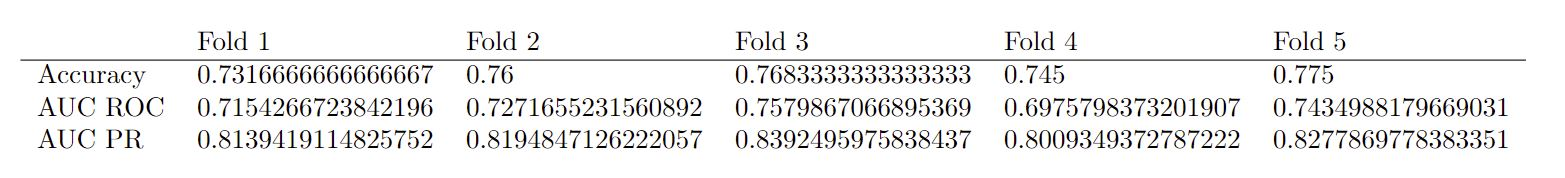

**Question 2.ii what is the mean and standard deviation of each performance metric (accuracy, AUCROC and AUC-PR)across all the folds for this classifier?Show code to demonstrate the results.**

In [32]:
print('Accuracy',acc)
print('Mean of Accuracy',np.mean(acc))
print('Stdev of Accuracy',np.std(acc))
print("\n")

print('AUC-ROC',roc)
print('Mean of AUC-ROC',np.mean(roc))
print('Stdev of AUC-ROC',np.std(roc))
print("\n")

print('AUC-PR',pr)
print('Mean of AUC-PR',np.mean(pr))
print('Stdev of AUC-PR',np.std(pr))

Accuracy [0.7316666666666667, 0.76, 0.7683333333333333, 0.745, 0.775]
Mean of Accuracy 0.756
Stdev of Accuracy 0.015762120556715848


AUC-ROC [0.7154266723842196, 0.7271655231560892, 0.7579867066895369, 0.6975798373201907, 0.7434988179669031]
Mean of AUC-ROC 0.7283315115033879
Stdev of AUC-ROC 0.021085718643071932


AUC-PR [0.8139419114825752, 0.8194847126222057, 0.8392495975838437, 0.8009349372787222, 0.8277869778383351]
Mean of AUC-PR 0.8202796273611364
Stdev of AUC-PR 0.012893685647029593


**Table Structure: Mean| Standard Deviation**



---
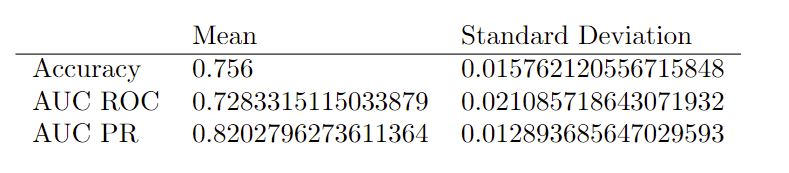

**Question 2.iii what is the impact of various forms of pre-processing on the cross-validation performance? Show code to demonstrate the results.**


**Answer 2.iii.**

Some of the pre-processing can help to increase the accuracy,AUC-ROC, and AUC-PR. However, some of the pre-processing method will make the rate worse than previous like Feature binarization. 

In [ ]:
#Standardization 
from sklearn import preprocessing
import numpy as np
#use preprocessing method to fit the dataset
scaler = preprocessing.StandardScaler().fit(xtrain)
std_xtrain = scaler.transform(xtrain)

acc_std = []
roc_std = []
pr_std = []

skf = StratifiedKFold(n_splits=5,shuffle = True)
for i,(tr_idx, v_idx) in enumerate(skf.split(std_xtrain, ytrain)):
    Xtr, Xv = std_xtrain[tr_idx], std_xtrain[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = KNeighborsClassifier(n_neighbors=1) 
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    acc_std.append(a)
    b = roc_auc_score(yv,p)
    roc_std.append(b)
    c = average_precision_score(yv,p)
    pr_std.append(c)
    
print('Accuracy std',acc_std)
print('Mean of AUC std',np.mean(acc_std))
print('Stdev of AUC std',np.std(acc_std))
print("\n")

print('AUC-ROC std',roc_std)
print('Mean of AUC-ROC std',np.mean(roc_std))
print('Stdev of AUC-ROC std',np.std(roc_std))
print("\n")

print('AUC-PR std',pr_std)
print('Mean of AUC-PR std',np.mean(pr_std))
print('Stdev of AUC-PR std',np.std(pr_std))

Accuracy std [0.7683333333333333, 0.7366666666666667, 0.7616666666666667, 0.7383333333333333, 0.745]
Mean of AUC std 0.75
Stdev of AUC std 0.012736648783028541


AUC-ROC std [0.7181067753001716, 0.7040094339622642, 0.7432997427101201, 0.7076371358737027, 0.7041511399607325]
Mean of AUC-ROC std 0.7154408455613982
Stdev of AUC-ROC std 0.014847611527134536


AUC-PR std [0.8133465894863977, 0.8065048513005277, 0.8298547121056994, 0.8073976168302409, 0.8048846796978608]
Mean of AUC-PR std 0.8123976898841454
Stdev of AUC-PR std 0.009184983772170259


In [ ]:
#Minimum_maximum_scaler
from sklearn import preprocessing
import numpy as np
#use min max scaler to preprocess
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(xtrain)

acc_mm = []
roc_mm = []
pr_mm = []

skf = StratifiedKFold(n_splits=5,shuffle = True)

for i,(tr_idx, v_idx) in enumerate(skf.split(x_train_minmax, ytrain)):
    Xtr, Xv = x_train_minmax[tr_idx], x_train_minmax[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = KNeighborsClassifier(n_neighbors=1) 
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    acc_mm.append(a)
    b = roc_auc_score(yv,p)
    roc_mm.append(b)
    c = average_precision_score(yv,p)
    pr_mm.append(c)
    
print('Accuracy mm',acc_mm)
print('Mean of AUC mm',np.mean(acc_mm))
print('Stdev of AUC mm',np.std(acc_mm))
print("\n")

print('AUC-ROC mm',roc_mm)
print('Mean of AUC-ROC mm',np.mean(roc_mm))
print('Stdev of AUC-ROC mm',np.std(roc_mm))
print("\n")

print('AUC-PR mm',pr_mm)
print('Mean of AUC-PR mm',np.mean(pr_mm))
print('Stdev of AUC-PR mm',np.std(pr_mm))

Accuracy mm [0.7633333333333333, 0.7466666666666667, 0.77, 0.7333333333333333, 0.7316666666666667]
Mean of AUC mm 0.749
Stdev of AUC mm 0.015477582354991871


AUC-ROC mm [0.7278623499142367, 0.7060999142367066, 0.7325793310463122, 0.7106623392234643, 0.7029090034859959]
Mean of AUC-ROC mm 0.7160225875813432
Stdev of AUC-ROC mm 0.01194540516560613


AUC-PR mm [0.819704263780984, 0.8072300199417088, 0.8222488093057336, 0.8095979552362531, 0.8048653929656968]
Mean of AUC-PR mm 0.8127292882460753
Stdev of AUC-PR mm 0.006944920621582721


In [ ]:
#Nomalization
from sklearn import preprocessing
import numpy as np
#use normalisation to preprocess
normalizer = preprocessing.Normalizer()
x_train_norm = normalizer.fit_transform(xtrain)

acc_norm = []
roc_morm = []
pr_norm = []

skf = StratifiedKFold(n_splits=5,shuffle = True)

for i,(tr_idx, v_idx) in enumerate(skf.split(x_train_norm, ytrain)):
    Xtr, Xv = x_train_norm[tr_idx], x_train_norm[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = KNeighborsClassifier(n_neighbors=1) 
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    acc_norm.append(a)
    b = roc_auc_score(yv,p)
    roc_morm.append(b)
    c = average_precision_score(yv,p)
    pr_norm.append(c)
    
print('Accuracy norm',acc_norm)
print('Mean of AUC norm',np.mean(acc_norm))
print('Stdev of AUC norm',np.std(acc_norm))
print("\n")

print('AUC-ROC norm',roc_morm)
print('Mean of AUC-ROC norm',np.mean(roc_morm))
print('Stdev of AUC-ROC norm',np.std(roc_morm))
print("\n")

print('AUC-PR norm',pr_norm)
print('Mean of AUC-PR norm',np.mean(pr_norm))
print('Stdev of AUC-PR norm',np.std(pr_norm))

Accuracy norm [0.765, 0.765, 0.7766666666666666, 0.7516666666666667, 0.745]
Mean AUC norm 0.7606666666666667
Stdev AUC norm 0.011135528725660026


AUC-ROC norm [0.7140866209262435, 0.7024549742710119, 0.7256646655231561, 0.6908081900869495, 0.6893657090195136]
Mean AUC-ROC norm 0.7044760319653749
Stdev AUC-ROC norm 0.013860288940469529


AUC-PR norm [0.8110861208077417, 0.8041633508749412, 0.8175047535468773, 0.796662328930531, 0.7961034886546916]
Mean AUC-PR norm 0.8051040085629566
Stdev AUC-PR norm 0.008279133935225943


In [ ]:
#Feature binarization
from sklearn import preprocessing
import numpy as np
#use binarization to preprocess the data
binarizer = preprocessing.Binarizer()
x_train_bina = binarizer.fit_transform(xtrain)

acc_b = []
roc_b = []
pr_b = []

skf = StratifiedKFold(n_splits=5,shuffle = True)

for i,(tr_idx, v_idx) in enumerate(skf.split(x_train_bina, ytrain)):
    Xtr, Xv = x_train_bina[tr_idx], x_train_bina[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = KNeighborsClassifier(n_neighbors=1) 
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    acc_b.append(a)
    b = roc_auc_score(yv,p)
    roc_b.append(b)
    c = average_precision_score(yv,p)
    pr_b.append(c)
    
print('Accuracy bina',acc_b)
print('Mean of AUC bina',np.mean(acc_b))
print('Stdev of AUC bina',np.std(acc_b))
print("\n")

print('AUC-ROC bina',roc_b)
print('Mean of AUC-ROC bina',np.mean(roc_b))
print('Stdev of AUC-ROC bina',np.std(roc_b))
print("\n")

print('AUC-PR bina',pr_b)
print('Mean of AUC-PR bina',np.mean(pr_b))
print('Stdev of AUC-PR bina',np.std(pr_b))

Accuracy bina [0.6133333333333333, 0.6066666666666667, 0.57, 0.5916666666666667, 0.5816666666666667]
Mean AUC bina 0.5926666666666667
Stdev AUC bina 0.01586750698054921


AUC-ROC bina [0.5502787307032591, 0.5538700686106347, 0.4930317324185248, 0.5099771607164323, 0.5094562647754137]
Mean AUC-ROC bina 0.5233227914448528
Stdev AUC-ROC bina 0.024280417961378257


AUC-PR bina [0.7284242480851858, 0.7300858732462506, 0.7037950605921153, 0.7091847332862761, 0.7089656051545914]
Mean AUC-PR bina 0.7160911040728839
Stdev AUC-PR bina 0.01093273417770362


**Table Structure: Standardization| Minimum_maximum_scaler |Nomalization|Feature binarization**


---

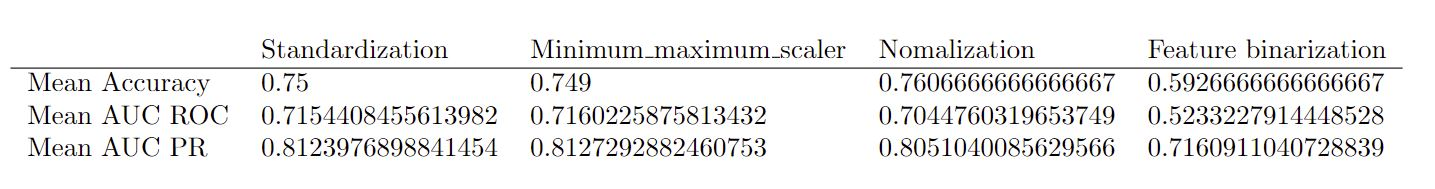

**Question 2.iv Use 5-fold cross-validation over training data to calculate the optimal value of k for the k-Nearest neighbour classifier. What is the optimal value of k and what are the crossvalidation accuracy, AUC-ROC and AUC-PR? Show code to demonstrate the results**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#this is the basic knn classisifer to the data without predict the optimal k value
acc_knn = []
roc_knn = []
pr_knn = []

skf = StratifiedKFold(n_splits=5,shuffle = True)

for i,(tr_idx, v_idx) in enumerate(skf.split(xtrain, ytrain)):
    Xtr, Xv = xtrain[tr_idx], xtrain[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = KNeighborsClassifier(n_neighbors=1) 
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    acc_knn.append(a)
    b = roc_auc_score(yv,p)
    roc_knn.append(b)
    c = average_precision_score(yv,p)
    pr_knn.append(c)
#print all the value to compare later 
print('Accuracy knn',acc_knn)
print('Mean of AUC knn',np.mean(acc_knn))
print('Stdev of AUC knn',np.std(acc_knn))
print("\n")

print('AUC-ROC knn',roc_knn)
print('Mean of AUC-ROC knn',np.mean(roc_knn))
print('Stdev of AUC-ROC knn',np.std(roc_knn))
print("\n")

print('AUC-PR knn',pr_knn)
print('Mean of AUC-PR knn',np.mean(pr_knn))
print('Stdev of AUC-PR knn',np.std(pr_knn))

Accuracy knn [0.7366666666666667, 0.755, 0.7733333333333333, 0.7333333333333333, 0.7616666666666667]
Mean AUC knn 0.752
Stdev AUC knn 0.015107025591499556


AUC-ROC knn [0.7289343910806175, 0.7203044596912521, 0.7349378216123499, 0.7024482109227872, 0.7406138558320312]
Mean AUC-ROC knn 0.7254477478278075
Stdev AUC-ROC knn 0.013324121917073746


AUC-PR knn [0.8223614814055237, 0.8154880037269974, 0.8235226961990703, 0.8044866385372714, 0.8269418682184639]
Mean AUC-PR knn 0.8185601376174653
Stdev AUC-PR knn 0.007960301415647117


The option "n neighbors" is vital in the classification of KNeighborsClassifier, and I use the "weights" parameter with "uniform" and "distance" in case points in the distance have different attributes but are weighted equally to those closer. In fact, "distance" produces a superior result.


In [ ]:
#this use the grid search CV to predict the optimal setting of the knn
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'weights':['uniform','distance'],
        'n_neighbors':[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
    }
]
 
knn_clf = KNeighborsClassifier()
gserach = GridSearchCV(knn_clf,param_grid, n_jobs = -1, cv = skf)
 
gserach.fit(xtrain, ytrain)

gserach.best_score_
gserach.best_params_
gserach.best_estimator_

print(gserach.best_score_)
print(gserach.best_params_)
print(gserach.best_estimator_)

0.7646666666666667
{'n_neighbors': 9, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=9, weights='distance')


In [ ]:
#this is the optimal knn
#use the previous prediction to create the knn classifier
from sklearn.neighbors import KNeighborsClassifier

acc_knn = []
roc_knn = []
pr_knn = []

skf = StratifiedKFold(n_splits=5,shuffle = True)

for i,(tr_idx, v_idx) in enumerate(skf.split(xtrain, ytrain)):
    Xtr, Xv = xtrain[tr_idx], xtrain[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = KNeighborsClassifier(n_neighbors=9,weights="distance") 
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    acc_knn.append(a)
    b = roc_auc_score(yv,p)
    roc_knn.append(b)
    c = average_precision_score(yv,p)
    pr_knn.append(c)
    
print('Accuracy of knn',acc_knn)
print('Mean of AUC knn',np.mean(acc_knn))
print('Stdev of AUC knn',np.std(acc_knn))
print("\n")

print('AUC-ROC of knn',roc_knn)
print('Mean of AUC-ROC knn',np.mean(roc_knn))
print('Stdev of AUC-ROC knn',np.std(roc_knn))
print("\n")

print('AUC-PR of knn',pr_knn)
print('Mean of AUC-PR knn',np.mean(pr_knn))
print('Stdev of AUC-PR knn',np.std(pr_knn))

Accuracy knn [0.7666666666666667, 0.745, 0.7866666666666666, 0.76, 0.76]
Mean AUC knn 0.7636666666666667
Stdev AUC knn 0.013515423288475516


AUC-ROC knn [0.6920025728987993, 0.6833190394511149, 0.7061535162950257, 0.6983611812317184, 0.6901470529310414]
Mean AUC-ROC knn 0.69399667256154
Stdev AUC-ROC knn 0.007741390561104127


AUC-PR knn [0.79806438265475, 0.7939405768813707, 0.8053854217061764, 0.8007058810858549, 0.7959487329342326]
Mean AUC-PR knn 0.7988089990524768
Stdev AUC-PR knn 0.003982075003103376


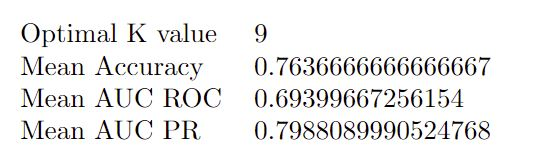

**Comparsion between standard and optimal:**


---

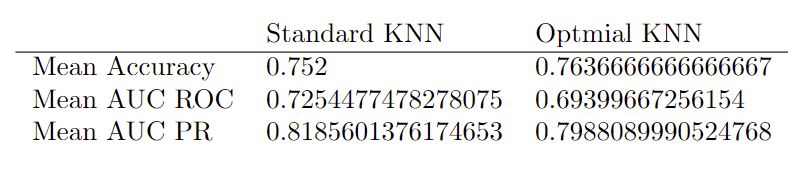

# **Question 3: CV**

**Answer 3:**

Every run will generate different result, therefore I will take one round result to summarise. Also, I will use each classifier to predict the best setting and output the result based on the predicted setting. In this case, KNN provides the best performance and result.

I will show the table in the following format: 

**Classifier|Mean-Accuracy|Mean-AUC-ROC|Mean-AUC-PR**


---
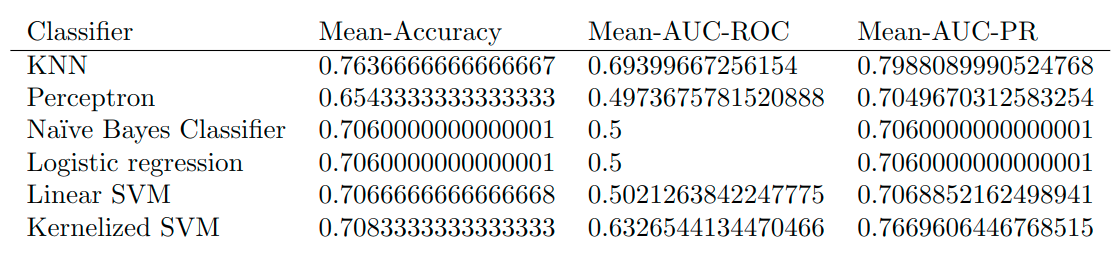

As KNN already run in the previous question, so I will start from Perceptron.

In [ ]:
#alpha and penalty to reduce overfitting of the model on perceptron classifier
from sklearn.linear_model import Perceptron
param_grid=[
    {'alpha':[1e-20,1e-19,1e-18,1e-17,1e-16,1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,
                     1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10],
     'penalty':['l1']},
    {'alpha':[1e-20,1e-19,1e-18,1e-17,1e-16,1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,
                     1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10],
     'penalty':['l2']},
]


perceptron_clf = Perceptron()
#use grid serach CV to calcualte the best setting
gsearch = GridSearchCV(perceptron_clf, param_grid, n_jobs = -1, cv = skf)

gsearch.fit(xtrain, ytrain)

gsearch.best_score_
gsearch.best_params_
gsearch.best_estimator_

print(gsearch.best_score_)
print(gsearch.best_params_)
print(gsearch.best_estimator_)

0.6849999999999999
{'alpha': 1, 'penalty': 'l1'}
Perceptron(alpha=1, penalty='l1')


In [ ]:
#optimal perceptron based on the above result
from sklearn.linear_model import Perceptron
acc_per = []
roc_per = []
pr_per = []

skf = StratifiedKFold(n_splits=5,shuffle = True)

#this is based on the previous prediction and the default setting
for i,(tr_idx, v_idx) in enumerate(skf.split(xtrain, ytrain)):
    Xtr, Xv = xtrain[tr_idx], xtrain[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = Perceptron(penalty='l1' , alpha=1, l1_ratio=0.15, fit_intercept=True, 
    shuffle=True, verbose=0, eta0=1.0,random_state=0, 
    validation_fraction=0.1, n_iter_no_change=5)
    
# (*, penalty='12', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
#  max_iter=None, tol=None, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, 
#  random_state=0, early_stopping=False, validation_fraction=0.1, 
#  n_iter_no_change=5, class_weight=None, warm_start=False)
    
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    acc_per.append(a)
    b = roc_auc_score(yv,p)
    roc_per.append(b)
    c = average_precision_score(yv,p)
    pr_per.append(c)
    
print('Accuracy of per',acc_per)
print('Mean of AUC per',np.mean(acc_per))
print('Stdev of AUC per',np.std(acc_per))
print("\n")

print('AUC-ROC of per',roc_per)
print('Mean of AUC-ROC per',np.mean(roc_per))
print('Stdev of AUC-ROC per',np.std(roc_per))
print("\n")

print('AUC-PR of per',pr_per)
print('Mean of AUC-PR per',np.mean(pr_per))
print('Stdev of AUC-PR per',np.std(pr_per))

Accuracy of per [0.6583333333333333, 0.705, 0.67, 0.705, 0.5333333333333333]
Mean of AUC per 0.6543333333333333
Stdev of AUC per 0.06330350174621727


AUC-ROC of per [0.5156518010291595, 0.5087907375643225, 0.4757182675814752, 0.5, 0.48667708458548703]
Mean of AUC-ROC per 0.4973675781520888
Stdev of AUC-ROC per 0.014523844689623311


AUC-PR of per [0.713225516621743, 0.710330322608295, 0.6967493776205451, 0.705, 0.6995299394410441]
Mean of AUC-PR per 0.7049670312583254
Stdev of AUC-PR per 0.006229933551498605


In [ ]:
from sklearn.naive_bayes import GaussianNB
param_grid={'var_smoothing':[1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100]}

nb_clf = GaussianNB()
#use grid serach CV to calcualte the best setting
gsearch = GridSearchCV(nb_clf, param_grid, cv = skf)

gsearch.fit(xtrain, ytrain)

gsearch.best_score_
gsearch.best_params_
gsearch.best_estimator_

print(gsearch.best_score_)
print(gsearch.best_params_)
print(gsearch.best_estimator_)

0.7060000000000001
{'var_smoothing': 100}
GaussianNB(var_smoothing=100)


In [ ]:
#optimal GaussianNB from previous result
from sklearn.naive_bayes import GaussianNB

acc_nb = []
roc_nb = []
pr_nb = []

skf = StratifiedKFold(n_splits=5,shuffle = True)

#user the predicted result to set up the classifier
for i,(tr_idx, v_idx) in enumerate(skf.split(xtrain, ytrain)):
    Xtr, Xv = xtrain[tr_idx], xtrain[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = GaussianNB(priors=None, var_smoothing=100)
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    acc_nb.append(a)
    b = roc_auc_score(yv,p)
    roc_nb.append(b)
    c = average_precision_score(yv,p)
    pr_nb.append(c)
    
print('Accuracy of nb',acc_nb)
print('Mean of AUC nb',np.mean(acc_nb))
print('Stdev of AUC nb',np.std(acc_nb))
print("\n")

print('AUC-ROC of nb',roc_nb)
print('Mean of AUC-ROC nb',np.mean(roc_nb))
print('Stdev of AUC-ROC nb',np.std(roc_nb))
print("\n")

print('AUC-PR of nb',pr_nb)
print('Mean of AUC-PR nb',np.mean(pr_nb))
print('Stdev of AUC-PR nb',np.std(pr_nb))

Accuracy of nb [0.7066666666666667, 0.7066666666666667, 0.7066666666666667, 0.705, 0.705]
Mean of AUC nb 0.7060000000000001
Stdev of AUC nb 0.0008164965809277448


AUC-ROC of nb [0.5, 0.5, 0.5, 0.5, 0.5]
Mean of AUC-ROC nb 0.5
Stdev of AUC-ROC nb 0.0


AUC-PR of nb [0.7066666666666667, 0.7066666666666667, 0.7066666666666667, 0.705, 0.705]
Mean of AUC-PR nb 0.7060000000000001
Stdev of AUC-PR nb 0.0008164965809277448


In [ ]:
#"Penalty" is used for regularization and smaller value of "C" could strenthen regularization.
from sklearn.linear_model import LogisticRegression
param_grid=[
    {'C':[1e-8,1e-7,1e-6,1e-5,1e-4],
     'penalty':['l1']},
    {'C':[1e-8,1e-7,1e-6,1e-5,1e-4],
     'penalty':['l2']},
]

lr_clf = LogisticRegression()
lr_clf.fit(xtrain,ytrain)
#use grid serach CV to calcualte the best setting
gsearch = GridSearchCV(lr_clf, param_grid, cv = skf)

gsearch.fit(xtrain, ytrain)

gsearch.best_score_
gsearch.best_params_
gsearch.best_estimator_

print(gsearch.best_score_)
print(gsearch.best_params_)
print(gsearch.best_estimator_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7060000000000001
{'C': 1e-08, 'penalty': 'l2'}
LogisticRegression(C=1e-08)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following

In [ ]:
#optimal LogisticRegression
from sklearn.linear_model import LogisticRegression

acc_lr = []
roc_lr = []
pr_lr = []

skf = StratifiedKFold(n_splits=5,shuffle = True)
#use the predicted variables to set up the classifier
for i,(tr_idx, v_idx) in enumerate(skf.split(xtrain, ytrain)):
    Xtr, Xv = xtrain[tr_idx], xtrain[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = LogisticRegression(C=1e-08, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
    

    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    acc_lr.append(a)
    b = roc_auc_score(yv,p)
    roc_lr.append(b)
    c = average_precision_score(yv,p)
    pr_lr.append(c)
    
print('Accuracy of lr',acc_lr)
print('Mean of AUC lr',np.mean(acc_lr))
print('Stdev of AUC lr',np.std(acc_lr))
print("\n")

print('AUC-ROC of lr',roc_lr)
print('Mean of AUC-ROC lr',np.mean(roc_lr))
print('Stdev of AUC-ROC lr',np.std(roc_lr))
print("\n")

print('AUC-PR of lr',pr_lr)
print('Mean of AUC-PR lr',np.mean(pr_lr))
print('Stdev of AUC-PR lr',np.std(pr_lr))

Accuracy of lr [0.7066666666666667, 0.7066666666666667, 0.7066666666666667, 0.705, 0.705]
Mean of AUC lr 0.7060000000000001
Stdev of AUC lr 0.0008164965809277448


AUC-ROC of lr [0.5, 0.5, 0.5, 0.5, 0.5]
Mean of AUC-ROC lr 0.5
Stdev of AUC-ROC lr 0.0


AUC-PR of lr [0.7066666666666667, 0.7066666666666667, 0.7066666666666667, 0.705, 0.705]
Mean of AUC-PR lr 0.7060000000000001
Stdev of AUC-PR lr 0.0008164965809277448


In [ ]:
#Applying smaller value of "C" could strenthen regularization.
from sklearn.svm import LinearSVC
param_grid={'tol':[1e-5,1e-4,1e-3,1e-2,1e-1,1,10],'C':[1e-8,1e-7,1e-6,1e-5,1e-4]}

lsvm_clf = LinearSVC()
#use grid serach CV to calcualte the best setting
gsearch = GridSearchCV(lsvm_clf, param_grid, cv = skf)

gsearch.fit(xtrain, ytrain)

gsearch.best_score_
gsearch.best_params_
gsearch.best_estimator_

print(gsearch.best_score_)
print(gsearch.best_params_)
print(gsearch.best_estimator_)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

0.7056666666666667
{'C': 1e-08, 'tol': 1}
LinearSVC(C=1e-08, tol=1)


In [ ]:
#optimal LinearSVC from previous
from sklearn.svm import LinearSVC

acc_lsvm = []
roc_lsvm = []
pr_lsvm = []

skf = StratifiedKFold(n_splits=5,shuffle = True)

#use previous prediction to set up the classifier, the rest are default
for i,(tr_idx, v_idx) in enumerate(skf.split(xtrain, ytrain)):
    Xtr, Xv = xtrain[tr_idx], xtrain[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = LinearSVC(C=1e-08, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=1,
     verbose=0)
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    acc_lsvm.append(a)
    b = roc_auc_score(yv,p)
    roc_lsvm.append(b)
    c = average_precision_score(yv,p)
    pr_lsvm.append(c)
    
print('Accuracy of lsvm',acc_lsvm)
print('Mean of AUC lsvm',np.mean(acc_lsvm))
print('Stdev of AUC lsvm',np.std(acc_lsvm))
print("\n")

print('AUC-ROC of lsvm',roc_lsvm)
print('Mean of AUC-ROC lsvm',np.mean(roc_lsvm))
print('Stdev of AUC-ROC lsvm',np.std(roc_lsvm))
print("\n")

print('AUC-PR of lsvm',pr_lsvm)
print('Mean of AUC-PR lsvm',np.mean(pr_lsvm))
print('Stdev of AUC-PR lsvm',np.std(pr_lsvm))

Accuracy of lsvm [0.7083333333333334, 0.7083333333333334, 0.705, 0.7033333333333334, 0.7083333333333334]
Mean of AUC lsvm 0.7066666666666668
Stdev of AUC lsvm 0.002108185106778933


AUC-ROC of lsvm [0.5028409090909092, 0.5028409090909092, 0.5004824185248714, 0.4988179669030733, 0.5056497175141244]
Mean of AUC-ROC lsvm 0.5021263842247775
Stdev of AUC-ROC lsvm 0.0023273683607663354


AUC-PR of lsvm [0.7078464106844741, 0.7078464106844741, 0.7068667235548813, 0.7045086767938684, 0.7073578595317725]
Mean of AUC-PR lsvm 0.7068852162498941
Stdev of AUC-PR lsvm 0.0012425347415549826


In [ ]:
#coef0 is like "C" in LinearSVC, for strenthen regularization.
from sklearn.svm import SVC
param_grid={'degree':[i for i in range(0,5)],'coef0':[1e-2,1e-1,1,10,100]}

#in here, I set the kernel as poly
ksvm_clf=SVC(kernel='poly')
#use grid serach CV to calcualte the best setting
gsearch = GridSearchCV(ksvm_clf, param_grid, cv = skf)

gsearch.fit(xtrain, ytrain)

gsearch.best_score_
gsearch.best_params_
gsearch.best_estimator_

print(gsearch.best_score_)
print(gsearch.best_params_)
print(gsearch.best_estimator_)

0.7306666666666668
{'coef0': 0.1, 'degree': 4}
SVC(coef0=0.1, degree=4, kernel='poly')


In [ ]:
#optimal Kernelized SVM
from sklearn.svm import SVC

acc_ksvm = []
roc_ksvm = []
pr_ksvm = []

skf = StratifiedKFold(n_splits=5,shuffle = True)

#use the previous setting to set up the classifier
for i,(tr_idx, v_idx) in enumerate(skf.split(xtrain, ytrain)):
    Xtr, Xv = xtrain[tr_idx], xtrain[v_idx]
    ytr, yv = ytrain[tr_idx], ytrain[v_idx]
    clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.1,
  decision_function_shape='ovr', degree=4, gamma='auto',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
    clf.fit(Xtr,ytr)
    p = clf.predict(Xv)
    a = accuracy_score(yv,p)
    acc_ksvm.append(a)
    b = roc_auc_score(yv,p)
    roc_ksvm.append(b)
    c = average_precision_score(yv,p)
    pr_ksvm.append(c)
    
print('Accuracy of ksvm',acc_ksvm)
print('Mean of AUC ksvm',np.mean(acc_ksvm))
print('Stdev of AUC ksvm',np.std(acc_ksvm))
print("\n")

print('AUC-ROC of ksvm',roc_ksvm)
print('Mean of AUC-ROC ksvm',np.mean(roc_ksvm))
print('Stdev of AUC-ROC ksvm',np.std(roc_ksvm))
print("\n")

print('AUC-PR of ksvm',pr_ksvm)
print('Mean of AUC-PR ksvm',np.mean(pr_ksvm))
print('Stdev of AUC-PR ksvm',np.std(pr_ksvm))

Accuracy of ksvm [0.7166666666666667, 0.7266666666666667, 0.7033333333333334, 0.7016666666666667, 0.6933333333333334]
Mean of AUC ksvm 0.7083333333333333
Stdev of AUC ksvm 0.01183215956619923


AUC-ROC of ksvm [0.654963550600343, 0.6420990566037736, 0.6172813036020582, 0.6290619866169812, 0.6198661698120769]
Mean of AUC-ROC ksvm 0.6326544134470466
Stdev of AUC-ROC ksvm 0.014139845098057432


AUC-PR of ksvm [0.7790988508787398, 0.7720115487078081, 0.7597101931122379, 0.7642830618435399, 0.7596995688419321]
Mean of AUC-PR ksvm 0.7669606446768515
Stdev of AUC-PR ksvm 0.007553931444353933


# **Question 4: PCA**

**Question 4.i Reduce the number of dimensions of the data using PCA to 2 and plot a scatter plot of the training data. What are your observations about the data based on data?**

As you can see that in the plot graph, there are deep blue and light blue to represent two different type of data. The deep blue looks like to be classified because all the deep blue dots are more cluster.

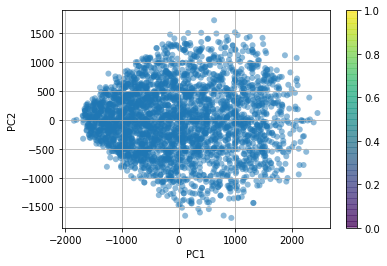

In [ ]:
from sklearn.decomposition import PCA
#as question reqires to set it to 2
pca2 = PCA(n_components=2)
pca2.fit(xtrain)
#transform the data onto principal components
projected2 = pca2.transform(xtrain)
#first principal component
i1 = 0 
#second principal component
i2 = 1 
plt.scatter(projected2[:, i1], projected2[:, i2],
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar();
plt.show()

**Question 4.ii Plot the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set.**

The number of dimension is 506.

(3000, 784)
(3000, 506)


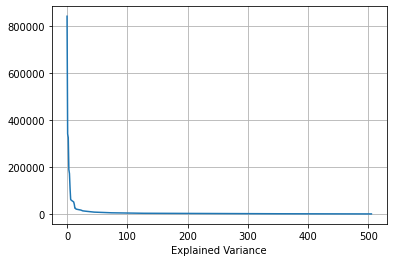

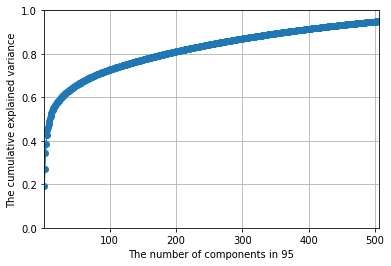

In [ ]:
pca95 = PCA(n_components=0.95)
pca95.fit(xtrain)
#transform the data onto principal components using pca95
projected95 = pca95.transform(xtrain)
print(xtrain.shape)
print(projected95.shape)
#create the chart
plt.plot(pca95.explained_variance_); plt.grid();
plt.xlabel('Explained Variance')
plt.figure()
plt.plot(np.arange(len(pca95.explained_variance_ratio_))+1,np.cumsum(pca95.explained_variance_ratio_),'o-') #plot the scree graph
plt.axis([1,len(pca95.explained_variance_ratio_),0,1])
plt.xlabel('The number of components in 95')
plt.ylabel('The cumulative explained variance');
plt.grid()
plt.show()

**Question 4.iii Reduce the number of dimensions of the data using PCA and perform classification. What is the (optimal) cross-validation performance of a Kernelized SVM classification with PCA? Remember to perform hyperparameter optimization**

**Answer 4.iii: PCA-Kernelized SVM, I used the PCA projected data(95% variance)**

In [ ]:
#to find the best score of the 95 variance
from sklearn.svm import SVC
param_grid={'degree':[i for i in range(0,5)],'coef0':[1e-2,1e-1,1,10,100]}

#in here, i set the kernel as poly again
pca_ksvm_clf=SVC(kernel='poly')

#use searchCV to find the best score
gsearch = GridSearchCV(pca_ksvm_clf, param_grid, cv = skf)

gsearch.fit(projected95, ytrain)

gsearch.best_score_
gsearch.best_params_
gsearch.best_estimator_

print(gsearch.best_score_)
print(gsearch.best_params_)
print(gsearch.best_estimator_)

0.7596666666666667
{'coef0': 0.1, 'degree': 3}
SVC(coef0=0.1, kernel='poly')


# Question 5

**Question 5: Develop an optimal pipeline for classification based on your analysis (Q1-Q4). You are free to use any tools at your disposal. However, no external data sources may be used. Describe your pipeline and report your results over the test data set. (You are required to submit your prediction file together with the assignment in a zip folder). Your prediction file should be a single column file containing the prediction score of the corresponding example in Xtest (be sure to have the same order!). Your prediction file should be named by your student ID, e.g., u100011.csv.**

I'll use the pipeline to implement scalar preprocessing and send the data to KNN. This is the pipeline that was used to create the supplied final file. MinMaxScaler is used to preprocess the data because it provided the best score from all the preprocessing method, and the classifier is a K neighbour classifier.

In [29]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
#load the Xtest file
ytrain = np.loadtxt('./Ytrain.csv')
xtrain = np.loadtxt('./Xtrain.csv')
xtest= np.loadtxt("Xtest.csv")
#use the best result preporcessing method in the previous in this question
scaler = preprocessing.MinMaxScaler()
#use the knn neighbor predicted in the above to this question which is 9
pipe_clf = Pipeline([('sc',scaler),('clf',KNeighborsClassifier(n_neighbors=9))] )
pipe_clf.fit(xtrain,ytrain)
ypredict=pipe_clf.predict_proba(xtest)
np.savetxt("u2184121.csv",ypredict,fmt ='%s')
